In [74]:
#plotly libraries
import plotly.express as px
import plotly.colors as pc
import plotly.graph_objects as go
import plotly.io as pio
import numpy as np

import sklearn.metrics as metrics
import pandas as pd
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

#default renderer (svg means very small file size, visibility on github, high quality, but requires sometimes setting height and width)
pio.renderers.default = "svg"

colors = ["#363b3d", "#727b76", "#31a240", "#f93939", "#f79118", "#de7b06", "#9b308f", "#dc759b"]
#additional defaults
px.defaults.color_discrete_sequence = ["rgb(100,100,100)"] + pc.qualitative.D3
px.defaults.width=1000
px.defaults.height=800

#set default template as "simple_white" (no background, no grid lines)
pio.templates["simple_white"].layout["yaxis"]["showgrid"] = True
pio.templates.default = "simple_white"

colorscale = pc.sequential.Plasma
colorscale = [colorscale[0]] + colorscale[3:8]

['#0d0887', '#46039f', '#7201a8', '#9c179e', '#bd3786', '#d8576b', '#ed7953', '#fb9f3a', '#fdca26', '#f0f921']


['#0d0887', '#9c179e', '#bd3786', '#d8576b', '#ed7953', '#fb9f3a']

In [85]:
figure_dir = f"{os.getcwd()}/figures/subsampling"
os.makedirs(figure_dir, exist_ok=True)

In [101]:

isoforms = [
    'RT1_unspliced1', 
    'RT2_unspliced2', 
    'RT2_Vif2_RT3_Vif1',
    'RT2_Vif3_RT3_Vif6', 
    'RT2_Vif4_RT3_Vif9', 
    'RT2_Vif5_RT3_Vif8',
    'RT2_Vif7', 
    
    'RT2_Vpr3_RT3_Vpr1', 
    'RT2_Vpr4_RT3_Vpr2',
       
    'RT2_Env1_RT3_Nef2', 
    'RT2_Env9_RT3_Nef4', 
    'RT2_Env2_RT3_Rev1',
    'RT2_Env3_RT3_Rev2', 
    'RT2_Env17_RT3_Nef9', 
    'RT2_Env5_RT3_Nef3',
    'RT2_Env13_RT3_Nef5', 
    'RT2_Env18_RT3_Rev13', 
    'RT2_Env10_RT3_Rev7',
    'RT2_Env19_RT3_Nef12', 
    'RT2_Env11_RT3_Rev8', 
    'RT2_Env14_RT3_Rev10',
    'RT2_Env15_RT3_Rev11', 
    'RT2_Env12_RT3_Rev9', 
    'RT2_Env6_RT3_Rev4',
    'RT2_Env7_RT3_Rev5', 
    'RT2_Env4_RT3_Rev3', 
    'RT2_Env8_RT3_Rev6',
    'RT2_Env20_RT3_Nef11', 
    
    'RT2_Tat5_RT3_Tat1', 
    'RT2_Tat6_RT3_Tat2',
    'RT2_Tat7_RT3_Tat3', 
    'RT2_Tat8_RT3_Tat4', 
    'RT2_Tat12_RT3_Tat9',
    'RT3_Tat10', 
    'RT3_Tat11', 
    'RT3_Tat13', 
    'RT3_Tat15', 
    'RT3_Tat16',
    
    'RT3_Rev12', 
    
    'RT3_Nef16', 
    'RT3_Nef15', 
    'RT3_Nef19', 
    'RT3_Nef20',
    'RT3_Nef22', 
    'RT3_Nef23', 
    
    'RT3_sORF1', 
    'RT3_sORF3']


isoform_colors_RT2 = {
    " "  : "white",
    "unspliced" : "grey",
 'RT1_unspliced1': "black",
 'RT2_unspliced2': "black",

 'RT2_Env1_RT3_Nef2': "rgb(26,82,118)",
 'RT2_Env2_RT3_Rev1': "rgb(31,97,141)",
 'RT2_Env3_RT3_Rev2': "rgb(36,113,163)",
 'RT2_Env4_RT3_Rev3': "rgb(41,128,185)", 
 'RT2_Env5_RT3_Nef3': "rgb(84,153,199)",
 'RT2_Env6_RT3_Rev4': "rgb(127,179,213)",
 'RT2_Env7_RT3_Rev5': "rgb(169,204,227)", 
 'RT2_Env8_RT3_Rev6': "rgb(27,79,114)",
 'RT2_Env9_RT3_Nef4': "rgb(33,97,140)",
 'RT2_Env10_RT3_Rev7': "rgb(40,116,166)",
 'RT2_Env11_RT3_Rev8': "rgb(46,134,163)",
 'RT2_Env12_RT3_Rev9': "rgb(52,152,219)", 
 'RT2_Env13_RT3_Nef5': "rgb(93,173,226)",
 'RT2_Env14_RT3_Rev10': "rgb(133,193,233)",
 'RT2_Env15_RT3_Rev11': "rgb(174,214,241)",
 'RT2_Env17_RT3_Nef9': "rgb(84,153,199)",
 'RT2_Env18_RT3_Rev13': "rgb(127,179,213)",
 'RT2_Env19_RT3_Nef12': "rgb(169,204,224)",
 'RT2_Env20_RT3_Nef11': "rgb(174,214,241)", 
    
 'RT3_Nef16': "grey",
    'RT3_Nef15': "grey", 
    'RT3_Nef19': "grey", 
    'RT3_Nef20': "grey",
    'RT3_Nef22': "grey", 
    'RT3_Nef23': "grey", 

    'RT3_Rev12':"grey", 

 'RT2_Tat5_RT3_Tat1': "rgb(207,87,161)",
 'RT2_Tat6_RT3_Tat2': "rgb(217,144,188)",
 'RT2_Tat7_RT3_Tat3': "rgb(237,206,228)",
 'RT2_Tat8_RT3_Tat4': "rgb(221,168,200)",
 'RT2_Tat12_RT3_Tat9': "rgb(229,186,216)",

    'RT3_Tat10': "grey", 
    'RT3_Tat11': "grey", 
    'RT3_Tat13': "grey", 
    'RT3_Tat15': "grey", 
    'RT3_Tat16': "grey",
    
 'RT2_Vif2_RT3_Vif1': "rgb(96,22,135)",
 'RT2_Vif3_RT3_Vif6': "rgb(141,74,176)",
 'RT2_Vif4_RT3_Vif9': "rgb(170,89,212)",
 'RT2_Vif5_RT3_Vif8': "rgb(204,108,255)",
    'RT2_Vif7':"rgb(142,68,173)",
    
 'RT2_Vpr3_RT3_Vpr1': "rgb(168,30,45)",
 'RT2_Vpr4_RT3_Vpr2': "rgb(192,98,106)",

 'RT3_sORF1': "rgb(177,153,109)",
 'RT3_sORF3': "rgb(157,138,109)",
}


isoform_colors_RT3 = {
 'RT1_unspliced1': "black",
 'RT2_unspliced2': "black",

    "Nef" : "green",
 'RT2_Env1_RT3_Nef2': "rgb(17,120,100)",
 'RT2_Env5_RT3_Nef3': "rgb(20,143,119)",
 'RT2_Env9_RT3_Nef4': "rgb(23,165,137)",
 'RT2_Env13_RT3_Nef5': "rgb(26,188,156)",
 'RT2_Env17_RT3_Nef9': "rgb(72,201,176)",
 'RT2_Env20_RT3_Nef11': "rgb(118,215,196)", 
 'RT2_Env19_RT3_Nef12': "rgb(163,228,215)",
 'RT3_Nef15': "rgb(29,131,72)", 
 'RT3_Nef16': "rgb(35,155,86)",
 'RT3_Nef19': "rgb(40,180,99)", 
 'RT3_Nef20': "rgb(46,204,113)",
 'RT3_Nef22': "rgb(88,214,141)", 
 'RT3_Nef23': "rgb(130,224,170)", 

 'RT2_Env2_RT3_Rev1': "rgb(147,81,22)",
 'RT2_Env3_RT3_Rev2': "rgb(175,96,26)",
 'RT2_Env4_RT3_Rev3': "rgb(202,111,30)",
 'RT2_Env6_RT3_Rev4': "rgb(230,126,34)",
 'RT2_Env7_RT3_Rev5': "rgb(235,152,78)",
 'RT2_Env8_RT3_Rev6': "rgb(240,178,122)",
 'RT2_Env10_RT3_Rev7': "rgb(185,119,14)",
 'RT2_Env11_RT3_Rev8': "rgb(214,137,16)",
 'RT2_Env12_RT3_Rev9': "rgb(243,156,18)",
 'RT2_Env14_RT3_Rev10': "rgb(245,176,65)",
 'RT2_Env15_RT3_Rev11': "rgb(248,180,113)",
 'RT3_Rev12': "rgb(246,221,204)", 
 'RT2_Env18_RT3_Rev13': "rgb(250,215,160)",
 
    
 'RT2_Tat5_RT3_Tat1': "rgb(207,87,161)",
 'RT2_Tat6_RT3_Tat2': "rgb(217,144,188)",
 'RT2_Tat7_RT3_Tat3': "rgb(237,206,228)",
 'RT2_Tat8_RT3_Tat4': "rgb(221,168,200)",
 'RT2_Tat12_RT3_Tat9': "rgb(229,186,216)",

 'RT3_Tat10': "rgb(240,98,146)", 
 'RT3_Tat11': "rgb(244,143,177)", 
 'RT3_Tat13': "rgb(248,187,208)", 
 'RT3_Tat15': "rgb(252,200,215)", 
 'RT3_Tat16': "rgb(252,228,236)",
    
 'RT2_Vif2_RT3_Vif1': "rgb(96,22,135)",
 'RT2_Vif3_RT3_Vif6': "rgb(141,74,176)",
 'RT2_Vif4_RT3_Vif9': "rgb(170,89,212)",
 'RT2_Vif5_RT3_Vif8': "rgb(204,108,255)",
 'RT2_Vif7' : "grey",
 'RT2_Vpr3_RT3_Vpr1': "rgb(168,30,45)",
 'RT2_Vpr4_RT3_Vpr2': "rgb(192,98,106)",

 'RT3_sORF1': "rgb(177,153,109)",
 'RT3_sORF3': "rgb(157,138,109)",
}

# Subsampling 
## to evaluate whether increased sequencing depth may improve data quality

In [43]:
#use an excel (xlsx) sheet for samples, with required columns "Sample" and "barcode", samples must not contain spaces
import pandas as pd
samplesheet = pd.read_excel("./Samplesheet_example.xlsx", engine="openpyxl")
samples = samplesheet["sample"].values
samples

array(['Nanopore_HIV1_Rep1_RT-US_0mM_cell',
       'Nanopore_HIV1_Rep1_RT-US_57mM_cell',
       'Nanopore_HIV1_Rep1_RT-US_85mM_cell',
       'Nanopore_HIV1_Rep2_RT-US_0mM_cell',
       'Nanopore_HIV1_Rep2_RT-US_57mM_cell',
       'Nanopore_HIV1_Rep2_RT-US_85mM_cell',
       'Nanopore_HIV1_Rep1_RT-FS_0mM_cell',
       'Nanopore_HIV1_Rep1_RT-FS_57mM_cell',
       'Nanopore_HIV1_Rep1_RT-FS_85mM_cell',
       'Nanopore_HIV1_Rep2_RT-FS_0mM_cell',
       'Nanopore_HIV1_Rep2_RT-FS_57mM_cell',
       'Nanopore_HIV1_Rep2_RT-FS_85mM_cell'], dtype=object)

In [46]:
import os
data_folder = f"{os.getcwd()}/data"

In [47]:
def get_combined_sample(sample):
    return "_".join(sample.split("_")[3:5]) # adjust to naming scheme

In [48]:
# Same isoforms as in 1_Nano-DMS-MaP

read_counts_df = pd.read_pickle(f"{data_folder}/isoquant/read_counts.pickle")
per_replicate_df = pd.pivot(read_counts_df, index = ["RT_and_DMS", "isoform_id"], columns = "replicate", values = "count").reset_index()
per_replicate_df

min_cov = 200
min_cov_df = per_replicate_df[(per_replicate_df["Rep1"] > min_cov) & (per_replicate_df["Rep2"] > min_cov)]
isoforms_per_combined_sample = min_cov_df.groupby("RT_and_DMS").agg({"isoform_id" : list}).to_dict()["isoform_id"]

In [49]:
from slurmpy import Slurm
import os

bamstats_folder = f"{data_folder}/bam_stats"


## Bam file subsampling with sambamba

In [115]:
from slurmpy import Slurm
import numpy as np
import pandas as pd
import random

def subsample_bam(bam_file, coverage_file, outdir, subsample_mean_coverages, num_subsamples, num_threads = 10, start_iteration = 1):
    #get coverage across bam file
    slurm_sambamba = Slurm("sambamba", {"partition" : "cpu", "mem" : "2G", "cpus-per-task" : num_threads, "time" : "120"})

    coverages = pd.read_csv(coverage_file, sep="\t", header=None, names = ["isoform", "position", "count"])
    avg_coverage = coverages["count"].mean()
    
    os.makedirs(outdir, exist_ok=True)

    commands = []
    for subsample_mean_coverage in subsample_mean_coverages:
        subsample_ratio = subsample_mean_coverage / avg_coverage
        if subsample_ratio > 1:
            print("Requested subsample_size is larger than acquired number of reads")
            break

        for i in np.arange(start_iteration,start_iteration+num_subsamples):
            random.seed(int(i))
            subsampled_bam = f"{outdir}/{i}.bam"
            random_seed = random.randint(0,1000)
            np.savetxt(f"{outdir}/seed_{i}.tsv", [random_seed])

            commands.append(f"sambamba view -h -t {num_threads} -s {np.round(subsample_ratio,5)} -f bam --subsampling-seed={random_seed} {bam_file} -o {subsampled_bam}")
    command = "\n".join(commands)
    
    pid = slurm_sambamba.run(command)
    return pid

def dynamic_subsample_bam(bam_file, coverage_file, outdir, subsample_ratios, num_subsamples, min_cov = 100, num_threads = 10, start_iteration = 1):
    slurm_sambamba = Slurm("sambamba", {"partition" : "cpu", "mem" : "2G", "cpus-per-task" : num_threads, "time" : "120"})

    pid = {}
    
    coverages = pd.read_csv(coverage_file, sep="\t", header=None, names = ["isoform", "position", "count"])
    avg_coverage = coverages["count"].mean()
    
    subsample_mean_coverages = [int(avg_coverage*subsample_ratio) for subsample_ratio in subsample_ratios]
    
    os.makedirs(outdir, exist_ok=True)
    
    commands = []
    isoform_subsample_ratios = []
    for subsample_ratio in subsample_ratios:
        if avg_coverage*subsample_ratio >= min_cov:
            isoform_subsample_ratios.append(subsample_ratio)
            
            subsample_outdir = f"{outdir}/{subsample_ratio}"
            os.makedirs(subsample_outdir, exist_ok=True)

            for i in np.arange(start_iteration,start_iteration+num_subsamples):
                random.seed(int(i))
                subsampled_bam = f"{subsample_outdir}_{i}.bam"
                random_seed = random.randint(0,1000)
                np.savetxt(f"{subsample_outdir}/seed_{subsample_ratio}_{i}.tsv", [random_seed])

                commands.append(f"sambamba view -h -t {num_threads} -s {np.round(subsample_ratio,5)} -f bam --subsampling-seed={random_seed} {bam_file} -o {subsampled_bam}")
    command = "\n".join(commands)
    pid = slurm_sambamba.run(command)
    return command, isoform_subsample_ratios

In [8]:
import os
pids = {}
pids["sambamba"] = {}

#subsample_sizes = [250,500,750, 1000,1200, 1400,1600, 1800, 2000,2500,3000,3500, 4000,5000,7500,10000,12500,15000,17500,20000,25000,30000, 35000, 40000, 50000, 75000, 100000] #[50000, 75000, 100000, 250000, 500000]
subsample_ratios = [0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5,1.0]
num_subsamples = 10

bamstats_folder = f"{data_folder}/bam_stats"

subsample_ratios = {}

for sample in samples:
    subsample_ratios[sample] = {}
    
    pids["sambamba"][sample] = {}
    sample_outfolder = f"{bamstats_folder}/{sample}/"
    
    combined_sample = get_combined_sample(sample)
    sample_isoforms = isoforms_per_combined_sample[combined_sample]
    
    commands = []
    for isoform in sample_isoforms:
    
        bam_file = f"{data_folder}/bam/{sample}/LAST_{isoform}.bam"
        coverage_file = f"{bamstats_folder}/{sample}/coverage_{sample}_{isoform}.csv"
        sambamba_outdir = f"{data_folder}/subsample_bam/{sample}/{isoform}"
        
        pids["sambamba"][sample][isoform], subsample_ratios[sample][isoform] = dynamic_subsample_bam(bam_file, coverage_file, sambamba_outdir, subsample_ratios, num_subsamples, num_threads = 1)

b'Submitted batch job 1196150'
b'Submitted batch job 1196151'
b'Submitted batch job 1196153'
b'Submitted batch job 1196155'
b'Submitted batch job 1196156'
b'Submitted batch job 1196157'
b'Submitted batch job 1196159'
b'Submitted batch job 1196160'
b'Submitted batch job 1196161'
b'Submitted batch job 1196162'
b'Submitted batch job 1196164'
b'Submitted batch job 1196165'
b'Submitted batch job 1196166'
b'Submitted batch job 1196167'
b'Submitted batch job 1196168'
b'Submitted batch job 1196170'
b'Submitted batch job 1196171'
b'Submitted batch job 1196172'
b'Submitted batch job 1196173'
b'Submitted batch job 1196175'
b'Submitted batch job 1196176'
b'Submitted batch job 1196177'
b'Submitted batch job 1196178'
b'Submitted batch job 1196180'
b'Submitted batch job 1196181'
b'Submitted batch job 1196182'
b'Submitted batch job 1196183'
b'Submitted batch job 1196185'
b'Submitted batch job 1196186'
b'Submitted batch job 1196187'
b'Submitted batch job 1196188'
b'Submitted batch job 1196189'
b'Submit

# RNA Framework

In [9]:
rf_dir = f"{os.getcwd()}/tools/RNAFramework"  #specify path to RNAFramework

In [10]:
import hashlib
# Assumes the default UTF-8
#to generate random names for tmp directories


In [11]:
os.makedirs(f"{data_folder}/rfcount", exist_ok=True)
import hashlib
def rf_count(rf_dir, bam_file, rc_outdir, reference_fasta, pids, minq = 22, num_threads = 10, primer_mask = False):
    commands = []
    hash_object = hashlib.md5(bam_file.encode()).hexdigest()
    #to run rf-count with different settings comment/uncomment commands (and adjust output_dir naming)
    if primer_mask:
        commands.append(f"{rf_dir}/rf-count -p {num_threads} -mf {primer_mask} -o {rc_outdir}/q{minq}_eq10_ndni -r -ow -f {reference_fasta} --only-mut 'G>CT;A>CGT;C>AGT;T>ACG' -m -nd -ni -q {minq} -eq 10 -mm {bam_file}")
    else:
        commands.append(f"{rf_dir}/rf-count -p {num_threads} -o {rc_outdir}/q{minq}_eq10_ndni -r -ow -f {reference_fasta} --only-mut 'G>CT;A>CGT;C>AGT;T>ACG'  -m -nd -ni -q {minq} -eq 10 -mm {bam_file}")
    command = "\n".join(commands)

    return command

In [32]:
#primer_mask = f"{os.getcwd()}/references/mask_primers.csv"
num_threads = 1
slurm_rfcount = Slurm("rfcount", {"partition" : "cpu", "mem" : "2G", "cpus-per-task" : num_threads, "time" : "60"})

primer_mask = f"{os.getcwd()}/references/mask_primers_PCR1_2_3.csv"


for sample in samples:
    pids[sample] = {}
    combined_sample = get_combined_sample(sample)
    sample_isoforms = isoforms_per_combined_sample[combined_sample]
    for isoform in sample_isoforms:
        
        reference_fasta = f"{os.getcwd()}/references/transcripts_PCR1_2_3/{isoform}.fa"
        
        commands = []
        for subsample_ratio in subsample_ratios[sample][isoform]:
            for iteration in np.arange(1,num_subsamples):

                bam_file = f"{data_folder}/subsample_bam/{sample}/{isoform}/{subsample_ratio}_{iteration}.bam"
                
                if os.path.exists(bam_file):
                    rc_outdir = f"{data_folder}/subsample_rfcount/{sample}/{isoform}/{subsample_ratio}/{iteration}"
                    os.makedirs(rc_outdir, exist_ok=True)

                    command = rf_count(rf_dir, bam_file, rc_outdir, reference_fasta, pids, primer_mask = primer_mask,  num_threads = 2)
                    commands.append(command)
        if len(commands) >0:
            pids[sample] = slurm_rfcount.run("\n".join(commands))

b'Submitted batch job 1197188'
b'Submitted batch job 1197189'
b'Submitted batch job 1197190'
b'Submitted batch job 1197191'
b'Submitted batch job 1197192'
b'Submitted batch job 1197193'
b'Submitted batch job 1197194'
b'Submitted batch job 1197195'
b'Submitted batch job 1197196'
b'Submitted batch job 1197197'
b'Submitted batch job 1197198'
b'Submitted batch job 1197199'
b'Submitted batch job 1197200'
b'Submitted batch job 1197201'
b'Submitted batch job 1197202'
b'Submitted batch job 1197203'
b'Submitted batch job 1197204'
b'Submitted batch job 1197205'
b'Submitted batch job 1197206'
b'Submitted batch job 1197207'
b'Submitted batch job 1197208'
b'Submitted batch job 1197209'
b'Submitted batch job 1197210'
b'Submitted batch job 1197211'
b'Submitted batch job 1197212'
b'Submitted batch job 1197213'
b'Submitted batch job 1197214'
b'Submitted batch job 1197215'
b'Submitted batch job 1197216'
b'Submitted batch job 1197217'
b'Submitted batch job 1197218'
b'Submitted batch job 1197219'
b'Submit

In [66]:
rfnorm_outdir = f"{data_folder}/rfnorm/"
os.makedirs(rfnorm_outdir, exist_ok=True)

def rf_norm(rf_dir, rfnorm_outdir, rc_file, control_rc_file, num_threads = 10):
    pids = {}
    
    slurm_rfnorm = Slurm("rfnorm", {"partition" : "cpu", "mem" : "2G", "cpus-per-task" : num_threads, "time" : "480"})

    commands = []
    
    #specify the different rf-count outdir names here

    #running rfnorm with different reactive nt makes it easier to analyze them afterwards (e.g. for correlation analysis)
    for reactive_nt in ["ACGT", "ACT", "AC"]: #["ACGT", "AC", "ACT", "G"] #["AC", "ACT", "G"]

        this_rfnorm_outdir = f"{rfnorm_outdir}_{reactive_nt}"

        #standard procedure is using Siegfried method, which normalizes against control sample. Control vs itself does not work here. 
        if sample != control:
            os.makedirs(this_rfnorm_outdir, exist_ok=True)
            commands.append(f"{rf_dir}/rf-norm -p {num_threads} -t {rc_file} -u {control_rc_file} -o {this_rfnorm_outdir} --scoring-method 3 --norm-method 2 -rb {reactive_nt} --max-untreated-mut 0.2 --max-mutation-rate 0.8 --norm-independent -ow")

        #To get raw reactivities (e.g. for evaluation of total (DMS) mutation rates or signal-to-noise calculation) use the following

        os.makedirs(f"{this_rfnorm_outdir}_raw", exist_ok=True)
        commands.append(f"{rf_dir}/rf-norm -p {num_threads} -t {rc_file} -o {this_rfnorm_outdir}_raw --scoring-method 4 -D 6 -r -rb {reactive_nt} -ow")

    return "\n".join(commands)

## Calculating subsample correlation within each replicate

In [119]:
os.makedirs("data/rfcombine", exist_ok=True)
num_threads = 1
slurm_rfco = Slurm("rfco", {"partition" : "cpu", "mem" : "2G", "cpus-per-task" : num_threads, "time" : "10"})

minq = 22

for sample in samples:    
    
    split_sample = sample.split("_")
    split_sample[2] = "0mM"
    control = "_".join(split_sample)
    combined_control = get_combined_sample(control)

    combined_sample = get_combined_sample(sample)
    sample_isoforms = isoforms_per_combined_sample[combined_sample]

    for isoform in sample_isoforms:

        if isoform in isoforms_per_combined_sample[combined_control]:
            commands = []
            for subsample_ratio in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]: #subsample_ratios[sample][isoform]
                for iteration1 in np.arange(1,num_subsamples):
                    for iteration2 in np.arange(1,num_subsamples):
                        if iteration1 < iteration2:
                            #specify options again as used in rfcount_outdir 
                            for option in [f"q{minq}_eq10_ndni"]: 

                                #specify reactive_nt again as in rfnorm
                                for reactive_nt in ["AC"]: #["ACGT", "AC", "ACT", "G"]

                                    #include "_raw" if rfnorm was also run with Zubradt (4)
                                    for norm_option in [""]: #["", "_raw"]

                                        #assumes 2 replicates currently, extend if more
                                        xml1 = f"{data_folder}/subsample_rfnorm/{sample}/{isoform}/{subsample_ratio}/{iteration1}/{option}_{reactive_nt}{norm_option}/{isoform}.xml"
                                        xml2 = f"{data_folder}/subsample_rfnorm/{sample}/{isoform}/{subsample_ratio}/{iteration2}/{option}_{reactive_nt}{norm_option}/{isoform}.xml"

                                        if os.path.isfile(xml1) & os.path.isfile(xml2):
                                            corr_outdir= f"{data_folder}/subsample_rfcombine/{sample}/{isoform}/{subsample_ratio}/{iteration1}/{option}_{reactive_nt}{norm_option}/cross_correlation"
                                            os.makedirs(corr_outdir, exist_ok=True)
                                            outfile = f"{corr_outdir}/{iteration1}_{iteration2}_correlation.csv"

                                            commands.append(f"{rf_dir}/rf-correlate -o {outfile} -ow {xml1} {xml2}")
            command = "\n".join(commands)
            slurm_rfco.run(command)

b'Submitted batch job 1203362'
b'Submitted batch job 1203363'
b'Submitted batch job 1203364'
b'Submitted batch job 1203365'
b'Submitted batch job 1203366'
b'Submitted batch job 1203367'
b'Submitted batch job 1203368'
b'Submitted batch job 1203369'
b'Submitted batch job 1203370'
b'Submitted batch job 1203371'
b'Submitted batch job 1203372'
b'Submitted batch job 1203373'
b'Submitted batch job 1203374'
b'Submitted batch job 1203375'
b'Submitted batch job 1203376'
b'Submitted batch job 1203377'
b'Submitted batch job 1203378'
b'Submitted batch job 1203379'
b'Submitted batch job 1203380'
b'Submitted batch job 1203381'
b'Submitted batch job 1203382'
b'Submitted batch job 1203383'
b'Submitted batch job 1203384'
b'Submitted batch job 1203385'
b'Submitted batch job 1203386'
b'Submitted batch job 1203387'
b'Submitted batch job 1203388'
b'Submitted batch job 1203389'
b'Submitted batch job 1203390'
b'Submitted batch job 1203391'
b'Submitted batch job 1203392'
b'Submitted batch job 1203393'
b'Submit

In [120]:
tmp_data = []
for sample in samples:    
    
    split_sample = sample.split("_")
    split_sample[2] = "0mM"
    control = "_".join(split_sample)
    combined_control = get_combined_sample(control)

    combined_sample = get_combined_sample(sample)
    sample_isoforms = isoforms_per_combined_sample[combined_sample]

    for isoform in sample_isoforms:

        if isoform in isoforms_per_combined_sample[combined_control]:
            commands = []
            for subsample_ratio in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]: #subsample_ratios[sample][isoform]
                for iteration1 in np.arange(1,num_subsamples):
                    for iteration2 in np.arange(1,num_subsamples):
                        if iteration1 < iteration2:
                            
                            #specify options again as used in rfcount_outdir 
                            for option in [f"q{minq}_eq10_ndni"]: 

                                #specify reactive_nt again as in rfnorm
                                for reactive_nt in ["AC"]: #["ACGT", "AC", "ACT", "G"]

                                    #include "_raw" if rfnorm was also run with Zubradt (4)
                                    for norm_option in [""]: #["", "_raw"]
                                        
                                        corr_file = f"{data_folder}/subsample_rfcombine/{sample}/{isoform}/{subsample_ratio}/{iteration1}/{option}_{reactive_nt}/{iteration1}_{iteration2}_correlation.csv"
                                        try:
                                            reactivity_corr = np.genfromtxt(corr_file, delimiter=";")[1]
                                        except:
                                            reactivity_corr = np.nan

                                        tmp_data.append((sample, isoform, reactive_nt, option, subsample_ratio, iteration1, iteration2, reactivity_corr))


In [121]:
corr_df = pd.DataFrame(tmp_data, columns = ["sample", "RNA", "nt","rfcount_option", "subsample_ratio", "iteration1", "iteration2",  "reactivity_corr"])

In [123]:
bamstats_folder = f"{data_folder}/bam_stats"
os.makedirs(bamstats_folder, exist_ok=True)

tmp_data = []
for sample in samples:
    
    combined_sample = get_combined_sample(sample)
    sample_isoforms = isoforms_per_combined_sample[combined_sample]
    
    sample_outfolder = f"{bamstats_folder}/{sample}/"
    os.makedirs(sample_outfolder, exist_ok=True)
    
    commands = []
    for isoform in sample_isoforms:
        
        coverage_file = f"{sample_outfolder}/coverage_{sample}_{isoform}.csv"
        tmp_df = pd.read_csv(coverage_file, sep="\t", names = ["isoform", "position", "coverage"])
        tmp_df["sample"] = sample
        tmp_data.append(tmp_df)
coverage_df = pd.concat(tmp_data)
mean_coverage_df = coverage_df.groupby(["sample", "isoform"]).agg({"coverage":"mean"}).reset_index()

In [124]:
corr_df = pd.merge(corr_df, mean_coverage_df, left_on = ["sample", "RNA"], right_on = ["sample", "isoform"], how="left")
corr_df["subsample_coverage"] = corr_df["coverage"] * corr_df["subsample_ratio"]
corr_df["DMS_conc"] = corr_df["sample"].apply(lambda x: x.split("_")[4])

In [126]:
corr_df["replicate"] = corr_df["sample"].apply(lambda x: x.split("_")[2])

In [131]:

fig = px.box(corr_df.dropna(subset="reactivity_corr"), boxmode="overlay", x="subsample_coverage", y="reactivity_corr", facet_row="DMS_conc", color="isoform", facet_col="replicate", category_orders=order_dict, color_discrete_map = isoform_colors_RT3)
fig.update_traces(marker_size=2)
fig.update_yaxes(dtick=0.1, range=[0,1])
fig.show(renderer='png')
fig.write_image(f"{figure_dir}/subsample_size_vs_within_rep_reactivity_corr.svg")

In [132]:

fig = px.box(corr_df.dropna(subset="reactivity_corr"), boxmode="overlay", x="subsample_coverage", y="reactivity_corr", facet_row="DMS_conc", color="isoform", facet_col="replicate", category_orders=order_dict, color_discrete_map = isoform_colors_RT3)
fig.update_traces(marker_size=2)
fig.update_yaxes(dtick=0.1, range=[0,1])
fig.update_xaxes(type="log")
fig.show(renderer='png')
fig.write_image(f"{figure_dir}/log_subsample_size_vs_within_rep_reactivity_corr.svg")

In [137]:
mean_corr_df = corr_df.dropna(subset="reactivity_corr").groupby(["sample", "RNA", "subsample_ratio", "replicate", "nt", "subsample_coverage", "DMS_conc"]).agg({"reactivity_corr" : ["min", "max", "median", "mean", "std"]}).reset_index()
mean_corr_df.columns = ["sample", "RNA", "subsample_ratio", "replicate", "nt", "subsample_coverage", "DMS_conc", "min", "max", "median", "mean", "std"]

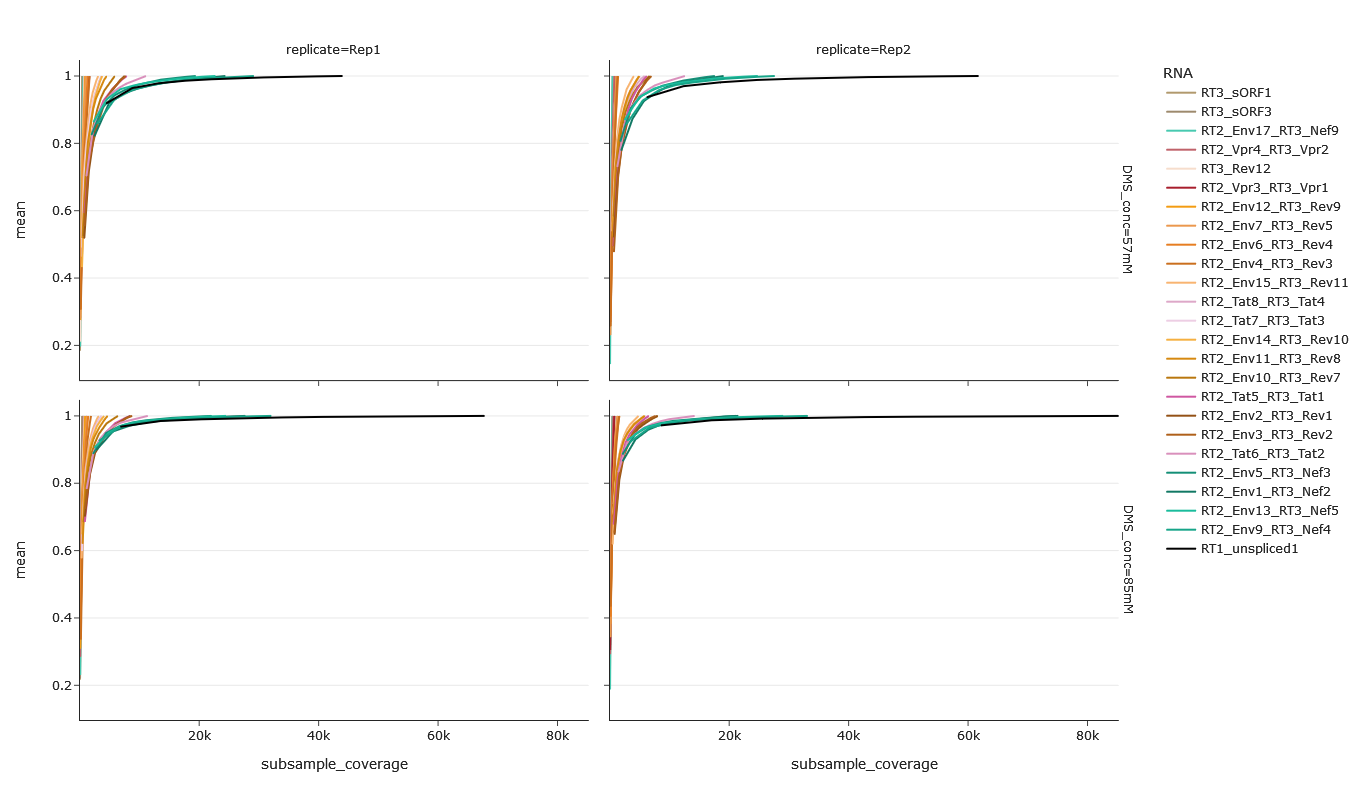

In [144]:
fig = px.line(mean_corr_df.sort_values("subsample_coverage", ascending=True), x="subsample_coverage", y="mean", color="RNA", facet_col="replicate", facet_row="DMS_conc", category_orders=order_dict, color_discrete_map = isoform_colors_RT3)
#fig.update_xaxes(type="log")
fig.write_image(f"figures/subsample_coverage_vs_median_pearson_corr_within_rep.svg")
fig.show(renderer="jupyterlab")


In [143]:
fig = px.line(mean_corr_df.sort_values("subsample_coverage", ascending=True), x="subsample_coverage", y="mean", color="RNA", facet_col="replicate", facet_row="DMS_conc", category_orders=order_dict, color_discrete_map = isoform_colors_RT3)
fig.update_xaxes(type="log")
fig.write_image(f"figures/log_subsample_coverage_vs_median_pearson_corr_within_rep.svg")
fig.show(renderer="jupyterlab")


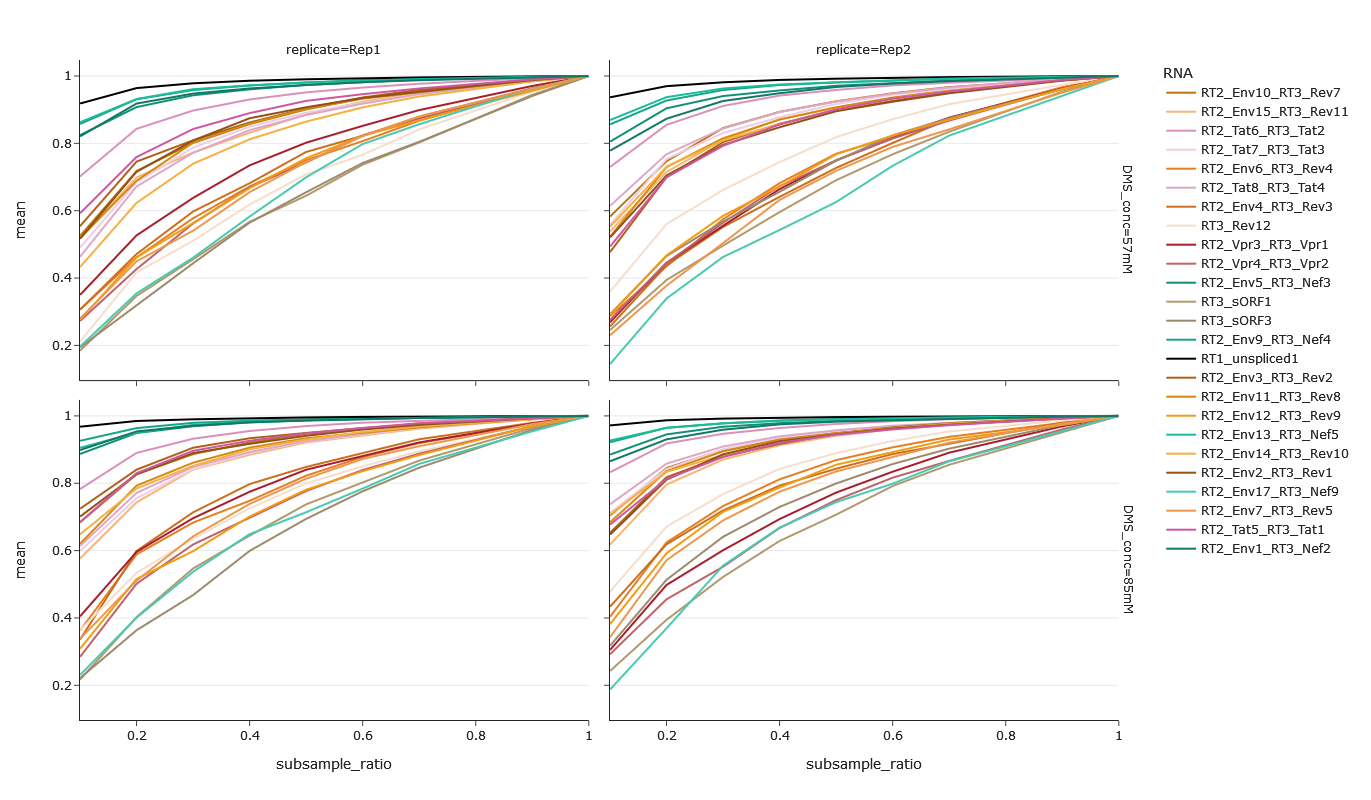

In [142]:
fig = px.line(mean_corr_df.sort_values("subsample_ratio", ascending=True), x="subsample_ratio", y="mean", color="RNA", facet_col="replicate", facet_row="DMS_conc", category_orders=order_dict, color_discrete_map = isoform_colors_RT3)
#fig.update_xaxes(type="log")
fig.write_image(f"figures/subsample_ratio_vs_median_pearson_corr_within_rep.svg")
fig.show(renderer="jupyterlab")


# Calculate correlation between replicates at different subsample_ratios

In [68]:
slurm_rfnorm = Slurm("rfnorm", {"partition" : "cpu", "mem" : "2G", "cpus-per-task" : num_threads, "time" : "480"})

for sample in samples:
    if not "57mM" in sample:
        pids[sample] = {}

        split_sample = sample.split("_")
        split_sample[4] = "0mM"  #Note: Change this with different sample setting!
        control = "_".join(split_sample)
        combined_control = get_combined_sample(control)

        combined_sample = get_combined_sample(sample)
        sample_isoforms = isoforms_per_combined_sample[combined_sample]

        for isoform in sample_isoforms:
            commands = []
            if isoform in isoforms_per_combined_sample[combined_control]:
                for subsample_ratio in subsample_ratios[sample][isoform]:
                    for iteration in np.arange(1,num_subsamples):
                        for option in [f"q{minq}_eq10_ndni"]:

                            rc_file = f"{data_folder}/subsample_rfcount/{sample}/{isoform}/{subsample_ratio}/{iteration}/{option}/{subsample_ratio}_{iteration}.rc"

                            #normalize against max coverage control file
                            control_rc_file = f"{data_folder}/rfcount/{control}/{isoform}/{option}/LAST_{isoform}.rc"

                            if os.path.exists(rc_file):

                                rfnorm_outdir = f"{data_folder}/subsample_rfnorm/{sample}/{isoform}/{subsample_ratio}/{iteration}/{option}"
                                command = rf_norm(rf_dir, rfnorm_outdir, rc_file, control_rc_file, num_threads = 2)
                                commands.append(command)

            if len(commands) >0:
                pids[f"{sample}_{subsample_ratio}"] = slurm_rfnorm.run("\n".join(commands))

b'Submitted batch job 1198270'
b'Submitted batch job 1198271'
b'Submitted batch job 1198272'
b'Submitted batch job 1198274'
b'Submitted batch job 1198275'
b'Submitted batch job 1198276'
b'Submitted batch job 1198277'
b'Submitted batch job 1198278'
b'Submitted batch job 1198279'
b'Submitted batch job 1198280'
b'Submitted batch job 1198281'
b'Submitted batch job 1198282'
b'Submitted batch job 1198283'
b'Submitted batch job 1198284'
b'Submitted batch job 1198285'
b'Submitted batch job 1198287'
b'Submitted batch job 1198288'
b'Submitted batch job 1198289'
b'Submitted batch job 1198290'
b'Submitted batch job 1198291'
b'Submitted batch job 1198292'
b'Submitted batch job 1198293'
b'Submitted batch job 1198294'
b'Submitted batch job 1198295'
b'Submitted batch job 1198296'
b'Submitted batch job 1198297'
b'Submitted batch job 1198298'
b'Submitted batch job 1198299'
b'Submitted batch job 1198300'
b'Submitted batch job 1198301'
b'Submitted batch job 1198302'
b'Submitted batch job 1198303'
b'Submit

In [73]:
os.makedirs("data/rfcombine", exist_ok=True)
num_threads = 1
slurm_rfco = Slurm("rfco", {"partition" : "cpu", "mem" : "2G", "cpus-per-task" : num_threads, "time" : "10"})

for sample in samples:
    if "57mM" in sample:
        continue
    if "Rep1" in sample:
        sample1 = sample
        sample2 = sample.replace("Rep1", "Rep2")
    else:
        sample1 = sample
        sample2 = sample.replace("Rep2", "Rep1")
    
    
    split_sample = sample.split("_")
    split_sample[2] = "0mM"
    control = "_".join(split_sample)
    combined_control = get_combined_sample(control)

    combined_sample = get_combined_sample(sample)
    sample_isoforms = isoforms_per_combined_sample[combined_sample]

    for isoform in sample_isoforms:

        if isoform in isoforms_per_combined_sample[combined_control]:
            commands = []
            for subsample_ratio in subsample_ratios[sample][isoform]:
                for iteration in np.arange(1,num_subsamples):

                    #specify options again as used in rfcount_outdir 
                    for option in [f"q{minq}_eq10_ndni"]: 

                        #specify reactive_nt again as in rfnorm
                        for reactive_nt in ["ACGT", "ACT", "AC"]: #["ACGT", "AC", "ACT", "G"]

                            #include "_raw" if rfnorm was also run with Zubradt (4)
                            for norm_option in ["", "_raw"]: #["", "_raw"]

                                #assumes 2 replicates currently, extend if more
                                xml1 = f"{data_folder}/subsample_rfnorm/{sample1}/{isoform}/{subsample_ratio}/{iteration}/{option}_{reactive_nt}{norm_option}/{isoform}.xml"
                                xml2 = f"{data_folder}/rfnorm/{sample2}/{isoform}/{option}_{reactive_nt}{norm_option}/{isoform}.xml"

                                if os.path.isfile(xml1) & os.path.isfile(xml2):

                                    xml_combined = f"{data_folder}/subsample_rfcombine/{sample1}/{isoform}/{subsample_ratio}/{iteration}/{option}_{reactive_nt}{norm_option}/"
                                    commands.append(f"{rf_dir}/rf-combine -d 6 -o {xml_combined} -ow {xml1} {xml2}")

                                    outfile = f"{xml_combined}/correlation.csv"

                                    commands.append(f"{rf_dir}/rf-correlate -o {outfile} -ow {xml1} {xml2}")
            command = "\n".join(commands)
            slurm_rfco.run(command)

b'Submitted batch job 1198923'
b'Submitted batch job 1198924'
b'Submitted batch job 1198925'
b'Submitted batch job 1198927'
b'Submitted batch job 1198929'
b'Submitted batch job 1198930'
b'Submitted batch job 1198931'
b'Submitted batch job 1198932'
b'Submitted batch job 1198933'
b'Submitted batch job 1198935'
b'Submitted batch job 1198936'
b'Submitted batch job 1198937'
b'Submitted batch job 1198938'
b'Submitted batch job 1198939'
b'Submitted batch job 1198940'
b'Submitted batch job 1198941'
b'Submitted batch job 1198943'
b'Submitted batch job 1198944'
b'Submitted batch job 1198945'
b'Submitted batch job 1198946'
b'Submitted batch job 1198947'
b'Submitted batch job 1198948'
b'Submitted batch job 1198949'
b'Submitted batch job 1198950'
b'Submitted batch job 1198951'
b'Submitted batch job 1198952'
b'Submitted batch job 1198953'
b'Submitted batch job 1198954'
b'Submitted batch job 1198955'
b'Submitted batch job 1198957'
b'Submitted batch job 1198958'
b'Submitted batch job 1198959'
b'Submit

In [77]:
tmp_data = []
for sample in samples:
    split_sample = sample.split("_")
    split_sample[2] = "0mM"
    control = "_".join(split_sample)
    combined_control = get_combined_sample(control)
    
    combined_sample = get_combined_sample(sample)
    sample_isoforms = isoforms_per_combined_sample[combined_sample]
    
    for isoform in sample_isoforms:
        
        if isoform in isoforms_per_combined_sample[combined_control]:
            commands = []
            for subsample_ratio in subsample_ratios[sample][isoform]:
                for iteration in np.arange(1,num_subsamples):

                    #specify options again as used in rfcount_outdir 
                    for option in [f"q{minq}_eq10_ndni"]: 

                        #specify reactive_nt again as in rfnorm
                        for reactive_nt in ["ACGT",  "ACT", "AC"]: #["ACGT", "AC", "ACT", "G"]
                            corr_file = f"{data_folder}/subsample_rfcombine/{sample}/{isoform}/{subsample_ratio}/{iteration}/{option}_{reactive_nt}/correlation.csv"
                            try:
                                reactivity_corr = np.genfromtxt(corr_file, delimiter=";")[1]
                            except:
                                reactivity_corr = np.nan
                            try: 
                                corr_file = f"{data_folder}/subsample_rfcombine/{sample}/{isoform}/{subsample_ratio}/{iteration}/{option}_{reactive_nt}_raw/correlation.csv"
                                raw_reactivity_corr = np.genfromtxt(corr_file, delimiter=";")[1]
                            except:
                                raw_reactivity_corr = np.nan

                            tmp_data.append((sample, isoform, reactive_nt, option, subsample_ratio, iteration, reactivity_corr, raw_reactivity_corr))


In [78]:
corr_df = pd.DataFrame(tmp_data, columns = ["sample", "RNA", "nt","option", "subsample_ratio", "iteration",  "reactivity_corr", "raw_reactivity_corr"])
corr_df.drop(columns = ["raw_reactivity_corr"])

sample             RNA    nt  \
0       Nanopore_HIV1_Rep1_RT-US_0mM_cell  RT1_unspliced1  ACGT   
1       Nanopore_HIV1_Rep1_RT-US_0mM_cell  RT1_unspliced1   ACT   
2       Nanopore_HIV1_Rep1_RT-US_0mM_cell  RT1_unspliced1    AC   
3       Nanopore_HIV1_Rep1_RT-US_0mM_cell  RT1_unspliced1  ACGT   
4       Nanopore_HIV1_Rep1_RT-US_0mM_cell  RT1_unspliced1   ACT   
...                                   ...             ...   ...   
39847  Nanopore_HIV1_Rep2_RT-FS_85mM_cell       RT3_sORF3   ACT   
39848  Nanopore_HIV1_Rep2_RT-FS_85mM_cell       RT3_sORF3    AC   
39849  Nanopore_HIV1_Rep2_RT-FS_85mM_cell       RT3_sORF3  ACGT   
39850  Nanopore_HIV1_Rep2_RT-FS_85mM_cell       RT3_sORF3   ACT   
39851  Nanopore_HIV1_Rep2_RT-FS_85mM_cell       RT3_sORF3    AC   

       subsample_ratio  iteration  reactivity_corr  
0                  0.1          1              NaN  
1                  0.1          1              NaN  
2                  0.1          1              NaN  
3                  0.1          2              NaN  
4                  0.1          2              NaN  
...                ...        ...              ...  
39847              1.0          8         0.445343  
39848              1.0          8         0.570543  
39849              1.0          9         0.390285  
39850              1.0          9         0.445343  
39851              1.0          9         0.570543  

[39852 rows x 6 columns]

In [79]:
bamstats_folder = f"{data_folder}/bam_stats"
os.makedirs(bamstats_folder, exist_ok=True)

tmp_data = []
for sample in samples:
    
    combined_sample = get_combined_sample(sample)
    sample_isoforms = isoforms_per_combined_sample[combined_sample]
    
    sample_outfolder = f"{bamstats_folder}/{sample}/"
    os.makedirs(sample_outfolder, exist_ok=True)
    
    commands = []
    for isoform in sample_isoforms:
        
        coverage_file = f"{sample_outfolder}/coverage_{sample}_{isoform}.csv"
        tmp_df = pd.read_csv(coverage_file, sep="\t", names = ["isoform", "position", "coverage"])
        tmp_df["sample"] = sample
        tmp_data.append(tmp_df)
coverage_df = pd.concat(tmp_data)
mean_coverage_df = coverage_df.groupby(["sample", "isoform"]).agg({"coverage":"mean"}).reset_index()

In [81]:
corr_df = pd.merge(corr_df, mean_coverage_df, left_on = ["sample", "RNA"], right_on = ["sample", "isoform"], how="left")
corr_df["subsample_coverage"] = corr_df["coverage"] * corr_df["subsample_ratio"]
corr_df["DMS_conc"] = corr_df["sample"].apply(lambda x: x.split("_")[4])

In [103]:
order_dict = {"isoform": list(isoform_colors_RT3.keys()),
             "DMS_conc" : ["57mM", "85mM"],
             "nt" : ["AC", "ACT", "ACGT"]}

## Plotting subsampling correlation between replicates

In [104]:

fig = px.box(corr_df.dropna(subset="reactivity_corr"), boxmode="overlay", x="subsample_coverage", y="reactivity_corr", facet_row="DMS_conc", color="isoform", facet_col="nt", category_orders=order_dict, color_discrete_map = isoform_colors_RT3)
fig.update_traces(marker_size=2)
fig.update_yaxes(dtick=0.1, range=[0,1])
fig.show(renderer='png')
fig.write_image(f"{figure_dir}/subsample_size_vs_reactivity_corr.svg")

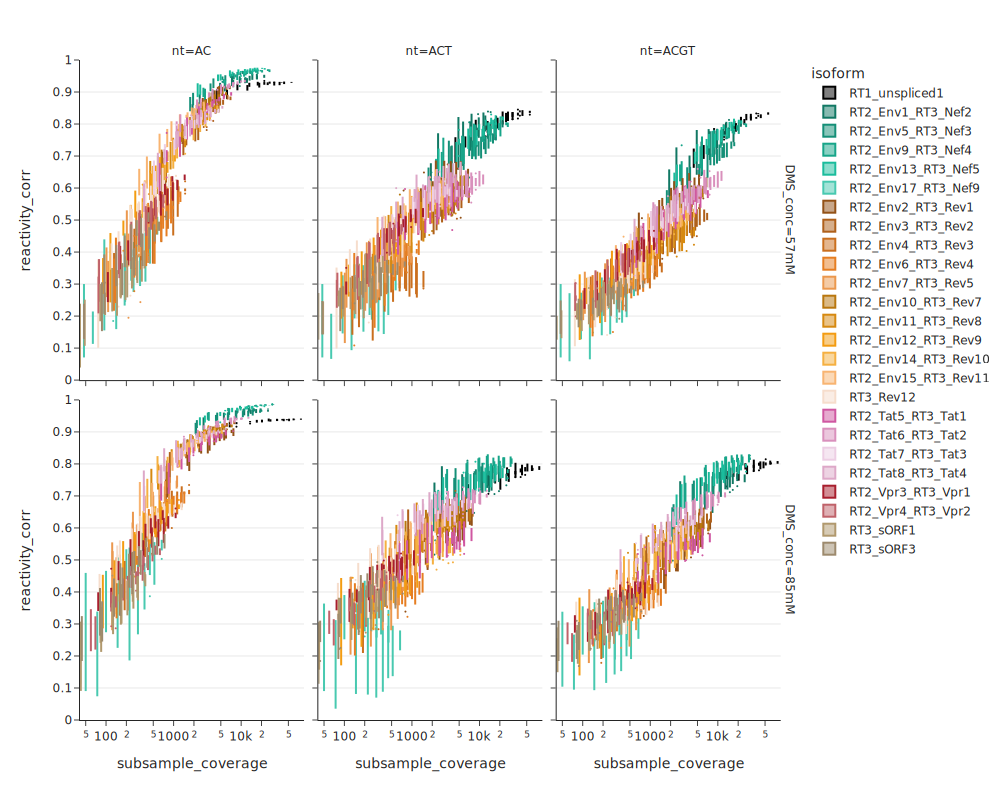

In [105]:
fig = px.box(corr_df.dropna(subset="reactivity_corr"), boxmode="overlay", x="subsample_coverage", y="reactivity_corr", facet_row="DMS_conc", color="isoform", facet_col="nt", category_orders=order_dict, color_discrete_map = isoform_colors_RT3)
fig.update_traces(marker_size=2)
fig.update_yaxes(dtick=0.1, range=[0,1])
fig.update_xaxes(type="log")
fig.show(renderer='png')
fig.write_image(f"{figure_dir}/log_subsample_size_vs_reactivity_corr.svg")

In [88]:
corr_df["replicate"] = corr_df["sample"].apply(lambda x : x.split("_")[0])

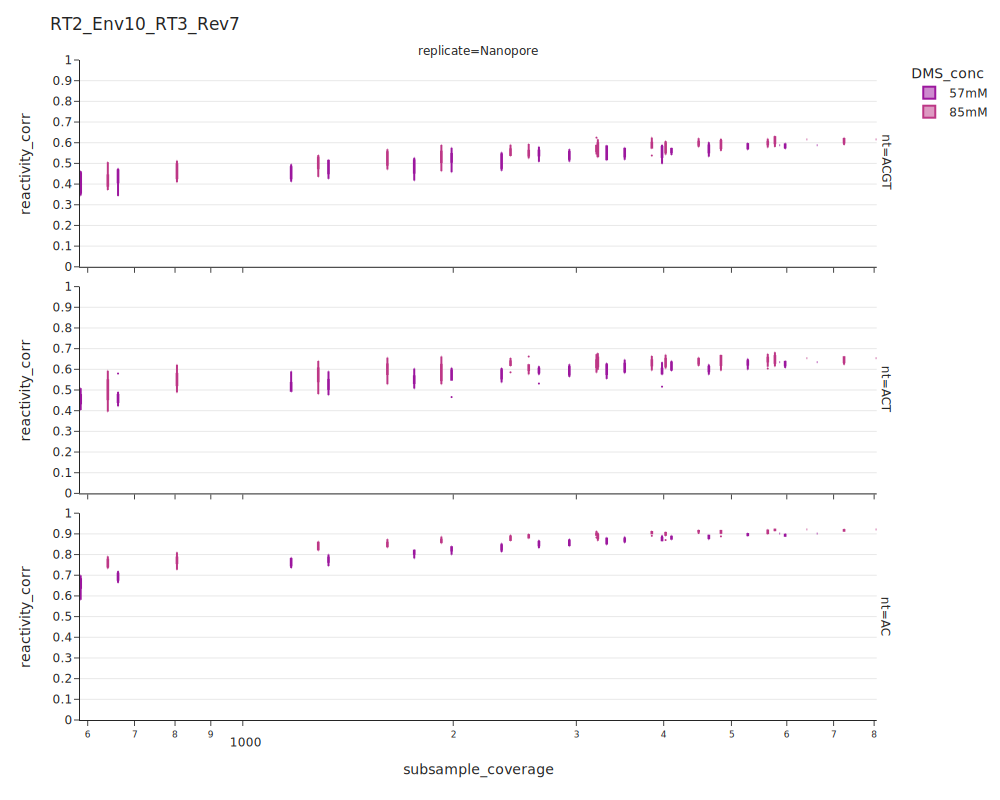

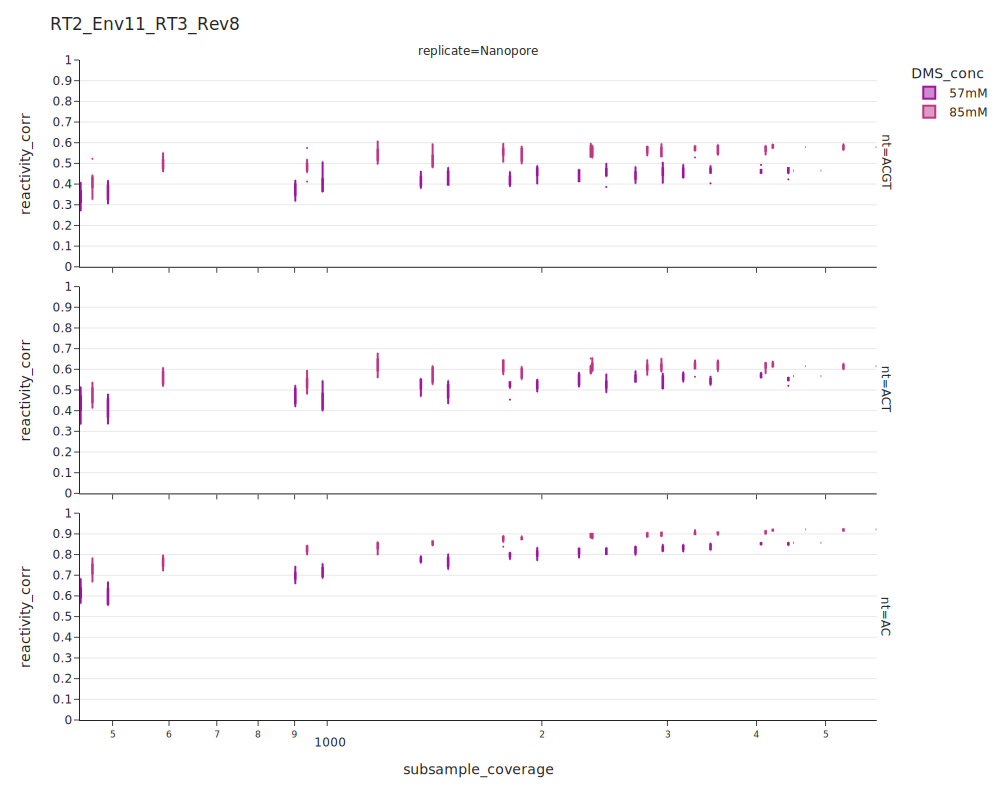

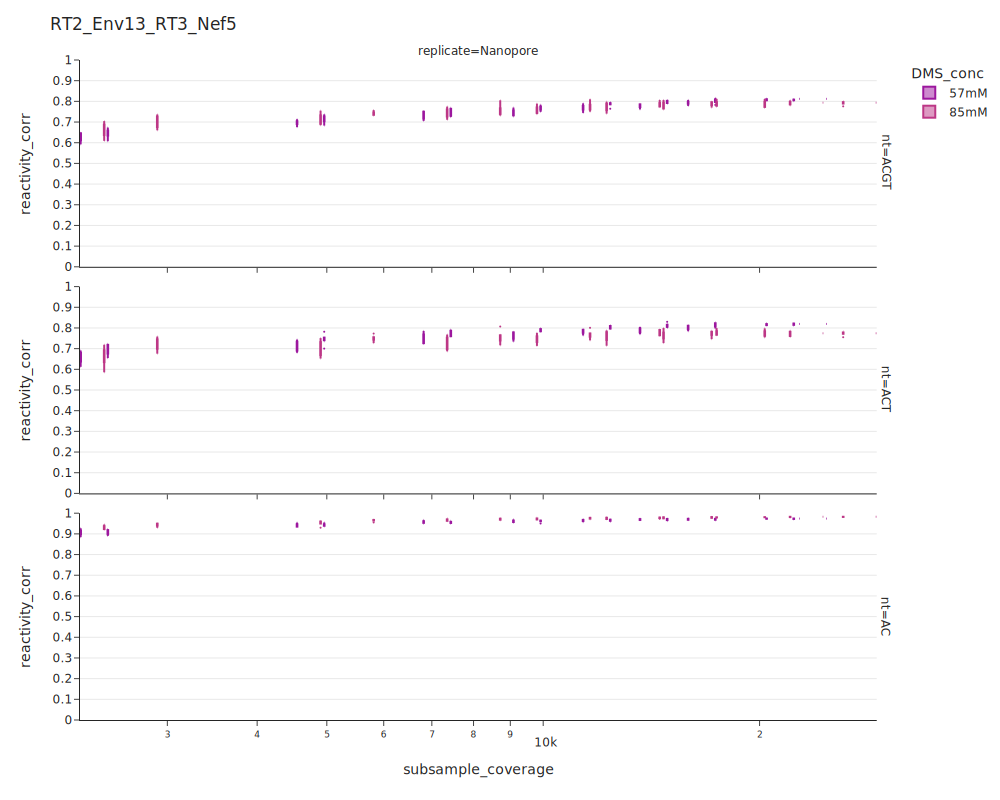

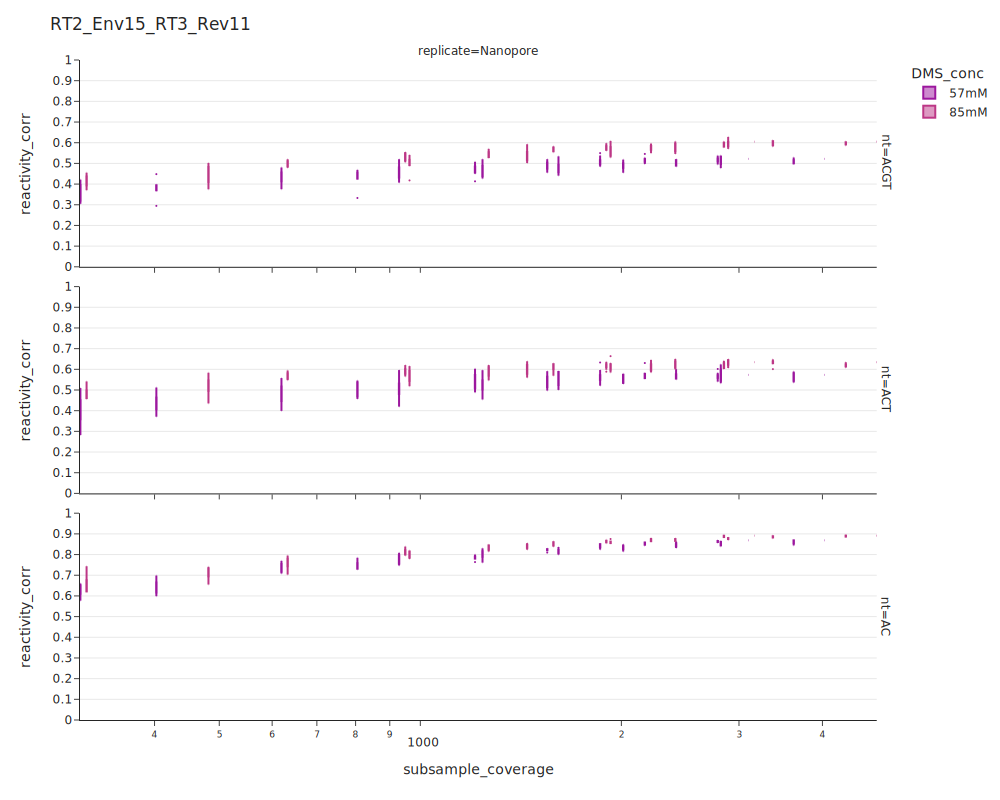

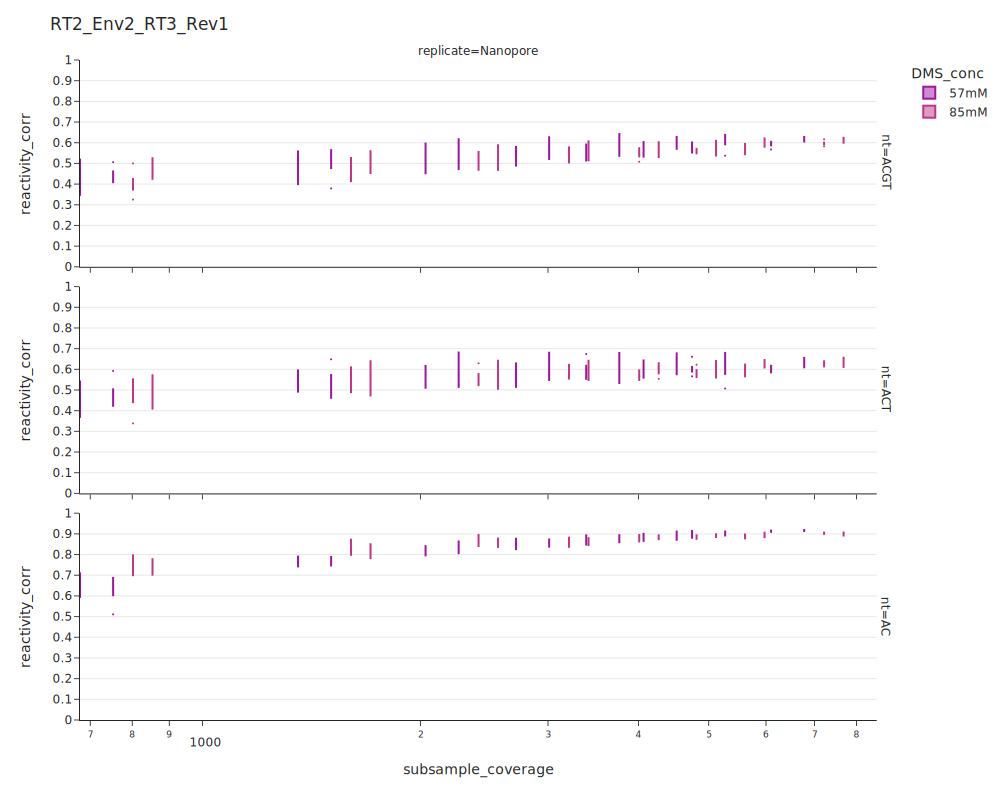

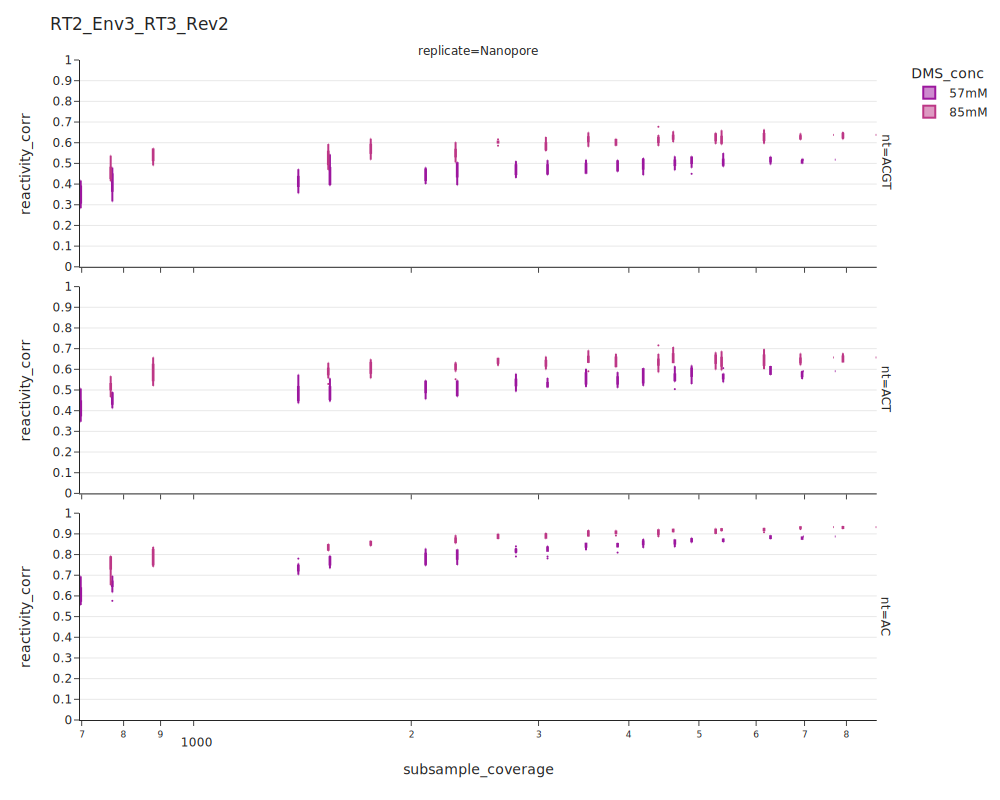

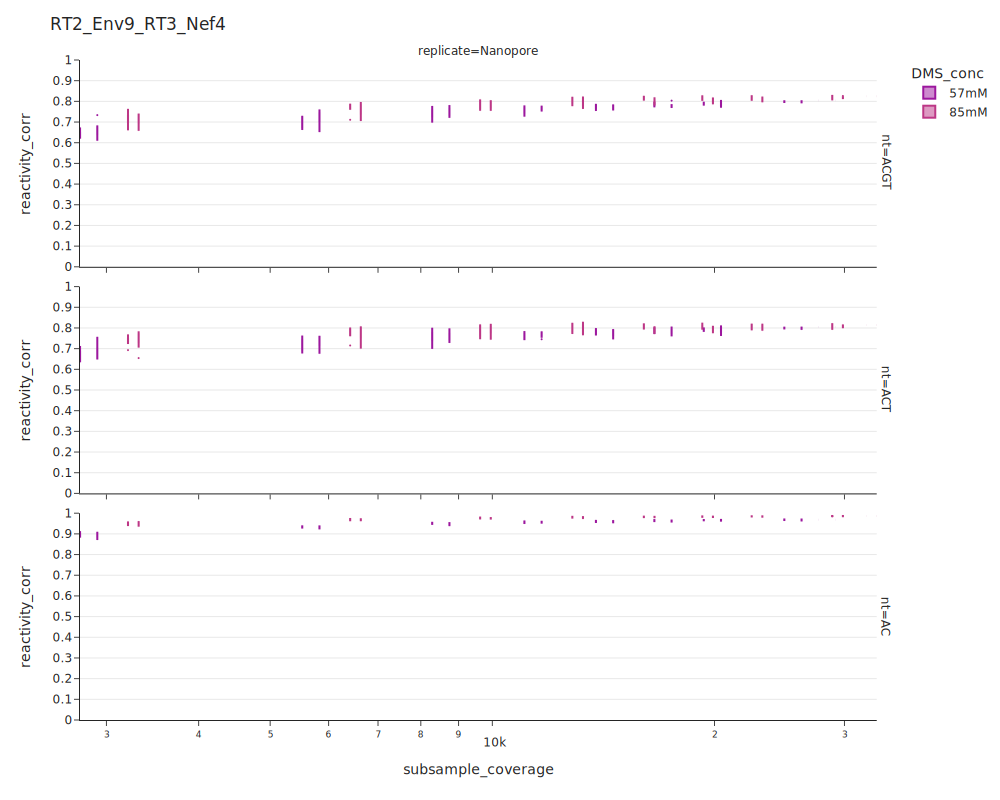

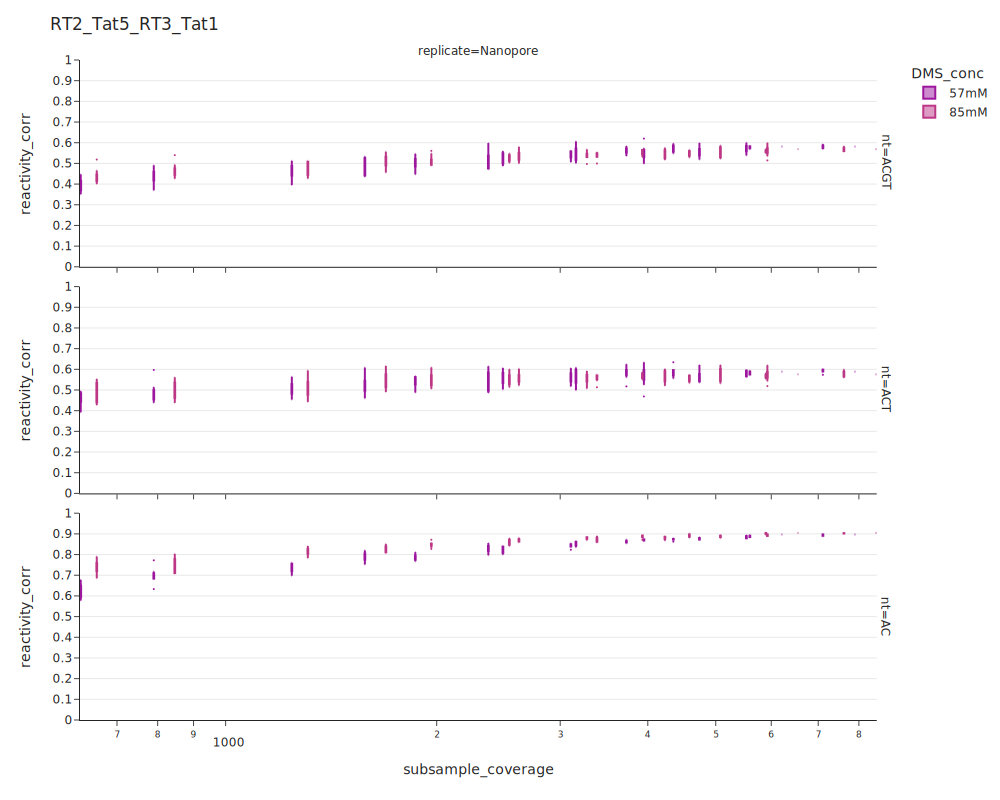

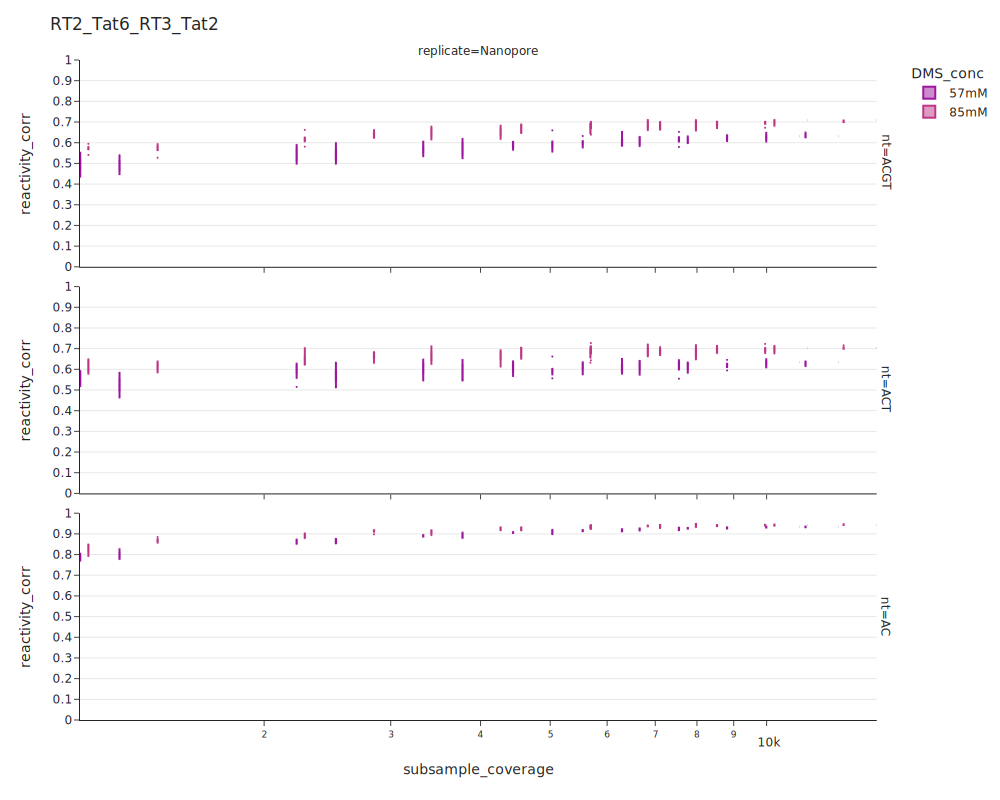

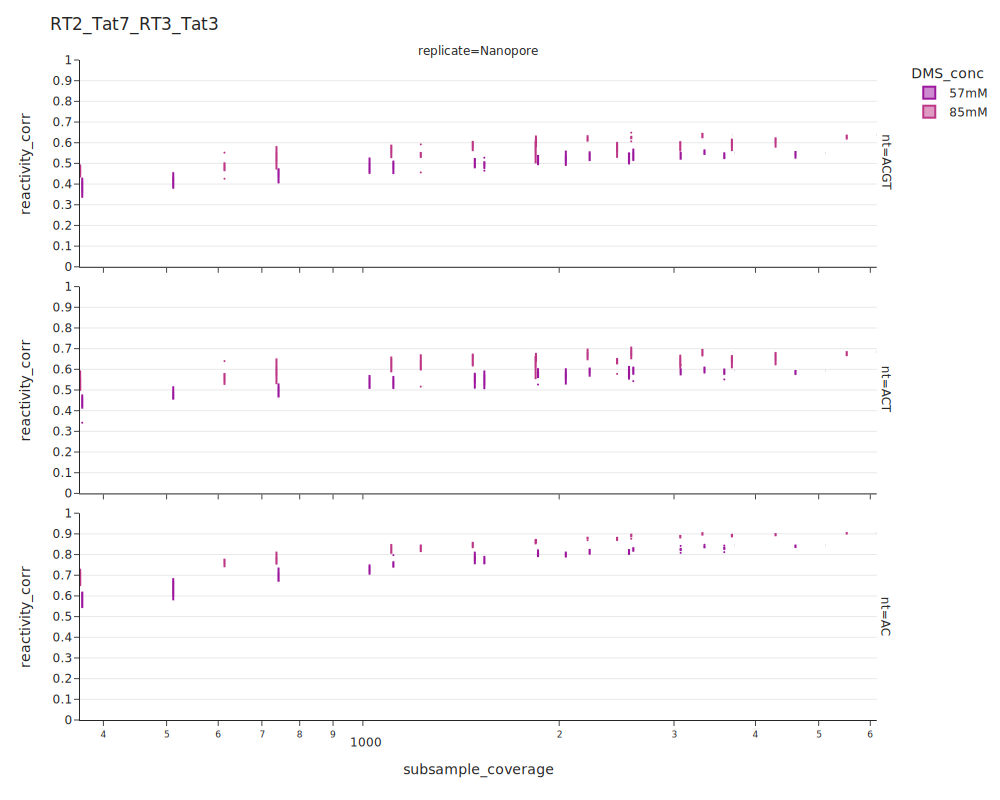

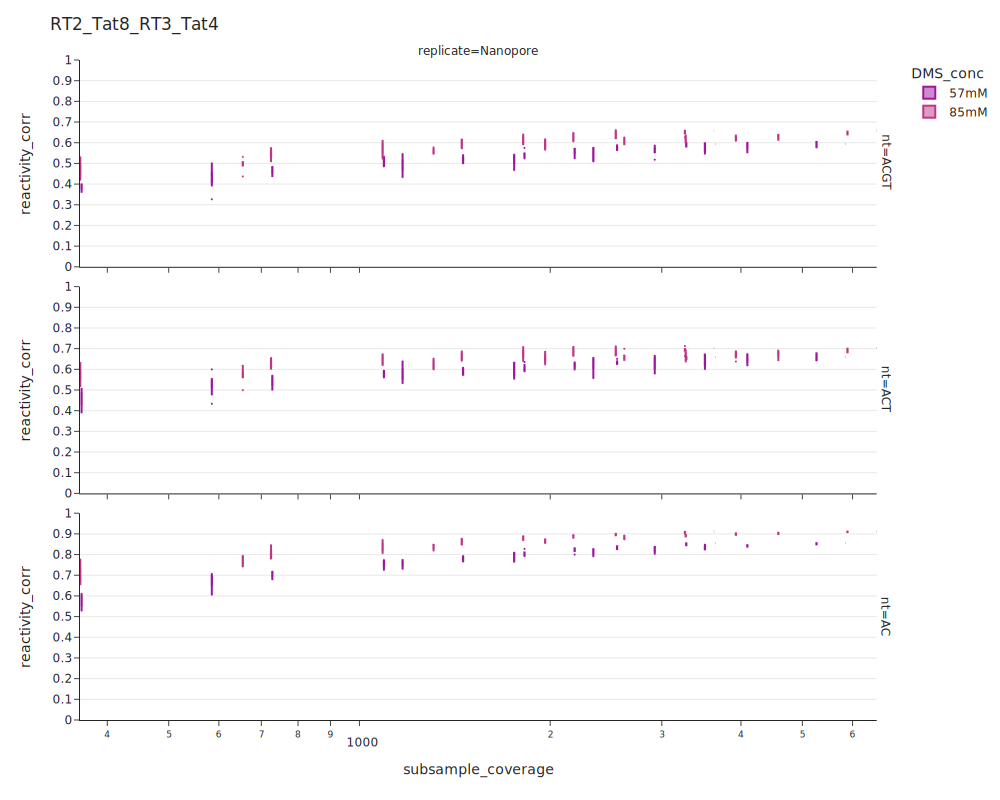

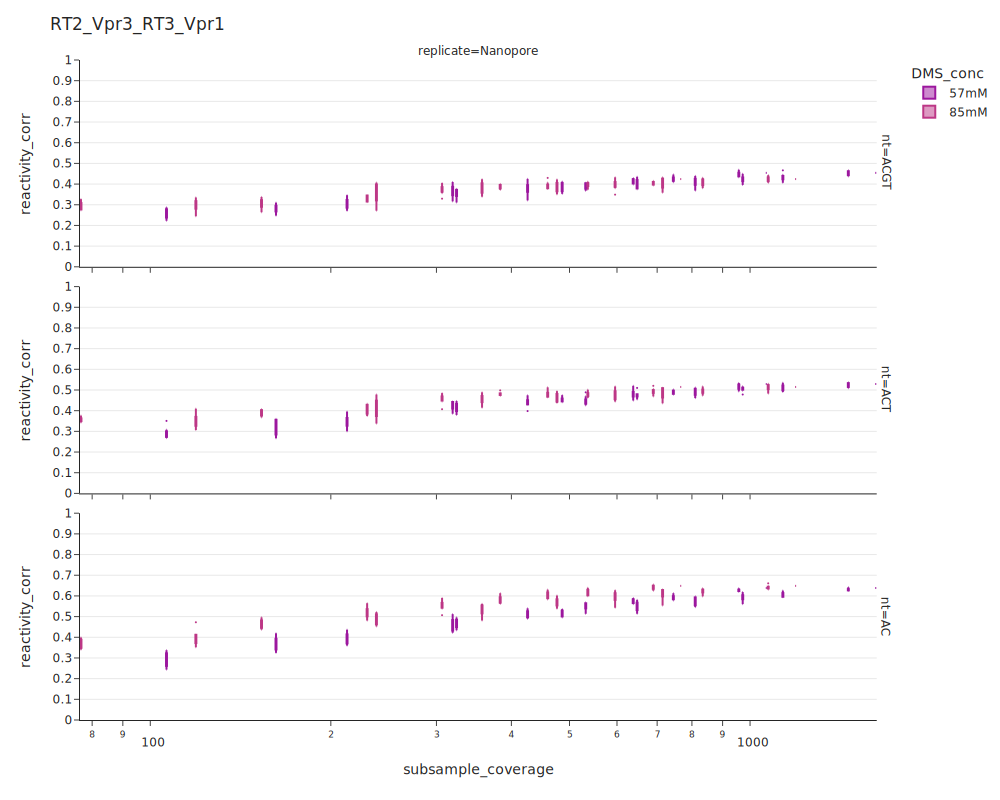

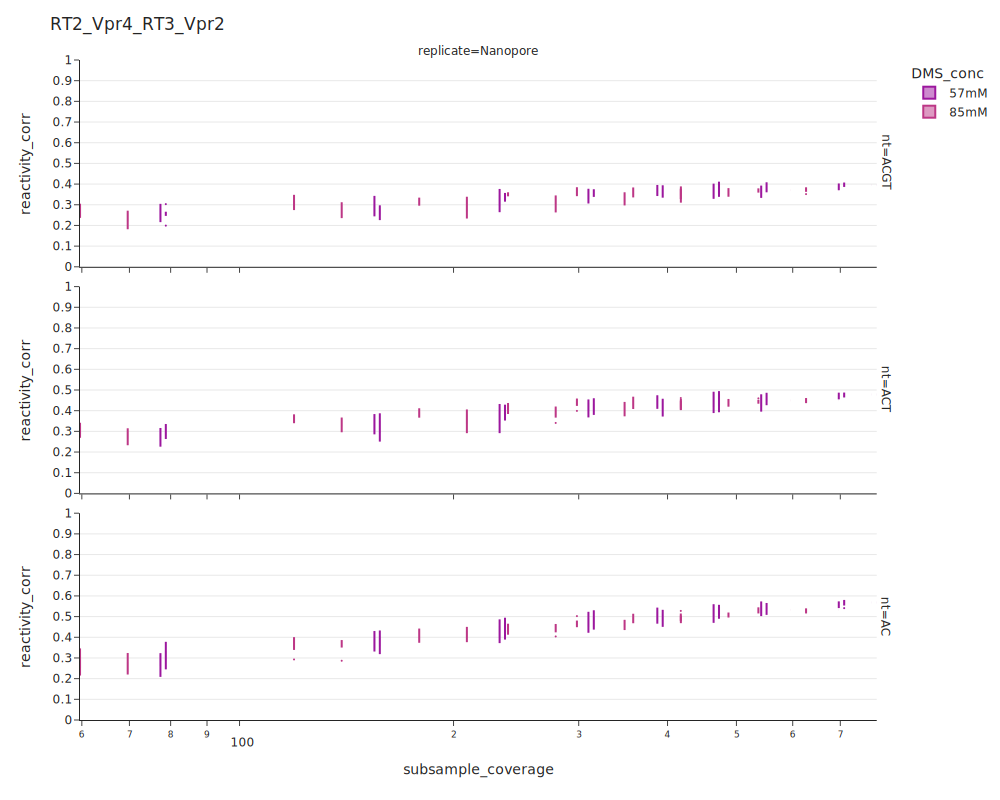

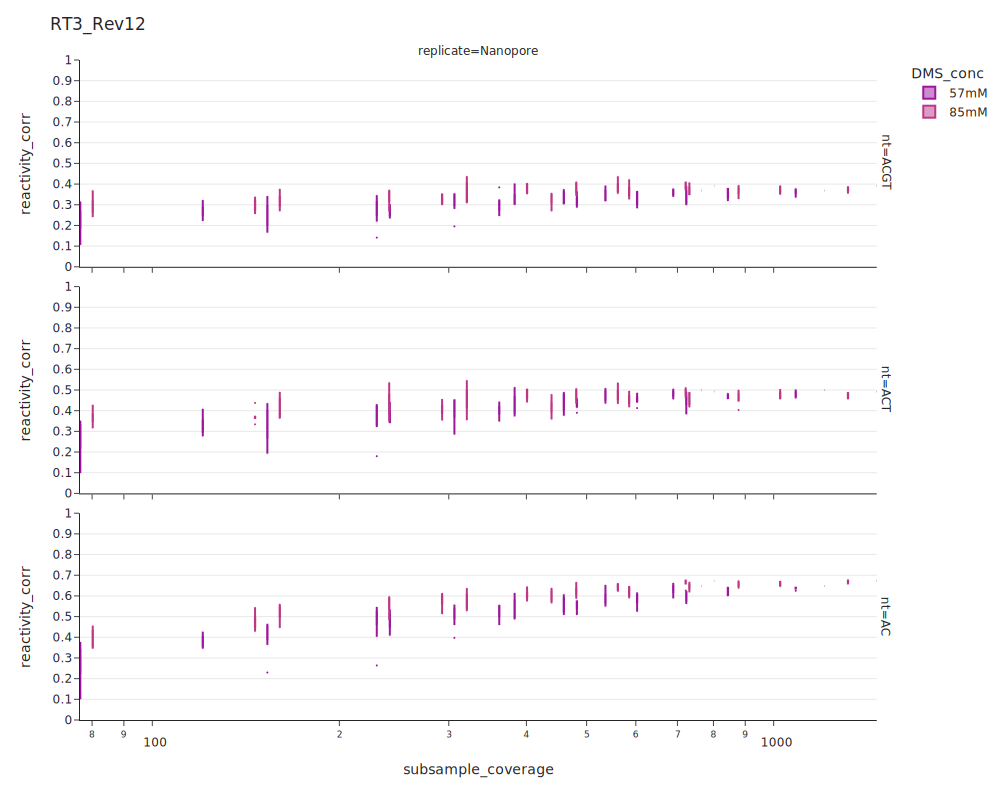

In [89]:
sub_df = corr_df.dropna(subset="reactivity_corr")
for isoform in corr_df.dropna(subset="reactivity_corr")["isoform"].unique():
    
    fig = px.box(sub_df[sub_df["isoform"] == isoform], boxmode="overlay", x="subsample_coverage", y="reactivity_corr", color="DMS_conc", facet_row="nt", color_discrete_sequence = colorscale[1:], facet_col="replicate")
    fig.update_traces(marker_size=2)
    fig.update_yaxes(dtick=0.1, range=[0,1])
    fig.update_xaxes(type="log")
    fig.update_layout(title=isoform, boxmode="overlay")
    fig.show(renderer='png')
    fig.write_image(f"{figure_dir}/log_subsample_size_vs_reactivity_corr_{isoform}.svg")

In [99]:
mean_corr_df = sub_df.groupby(["sample", "RNA", "subsample_ratio", "nt", "subsample_coverage", "DMS_conc"]).agg({"reactivity_corr" : ["min", "max", "median", "mean", "std"]}).reset_index()
mean_corr_df.columns = ["sample", "RNA", "subsample_ratio", "nt", "subsample_coverage", "DMS_conc", "min", "max", "median", "mean", "std"]

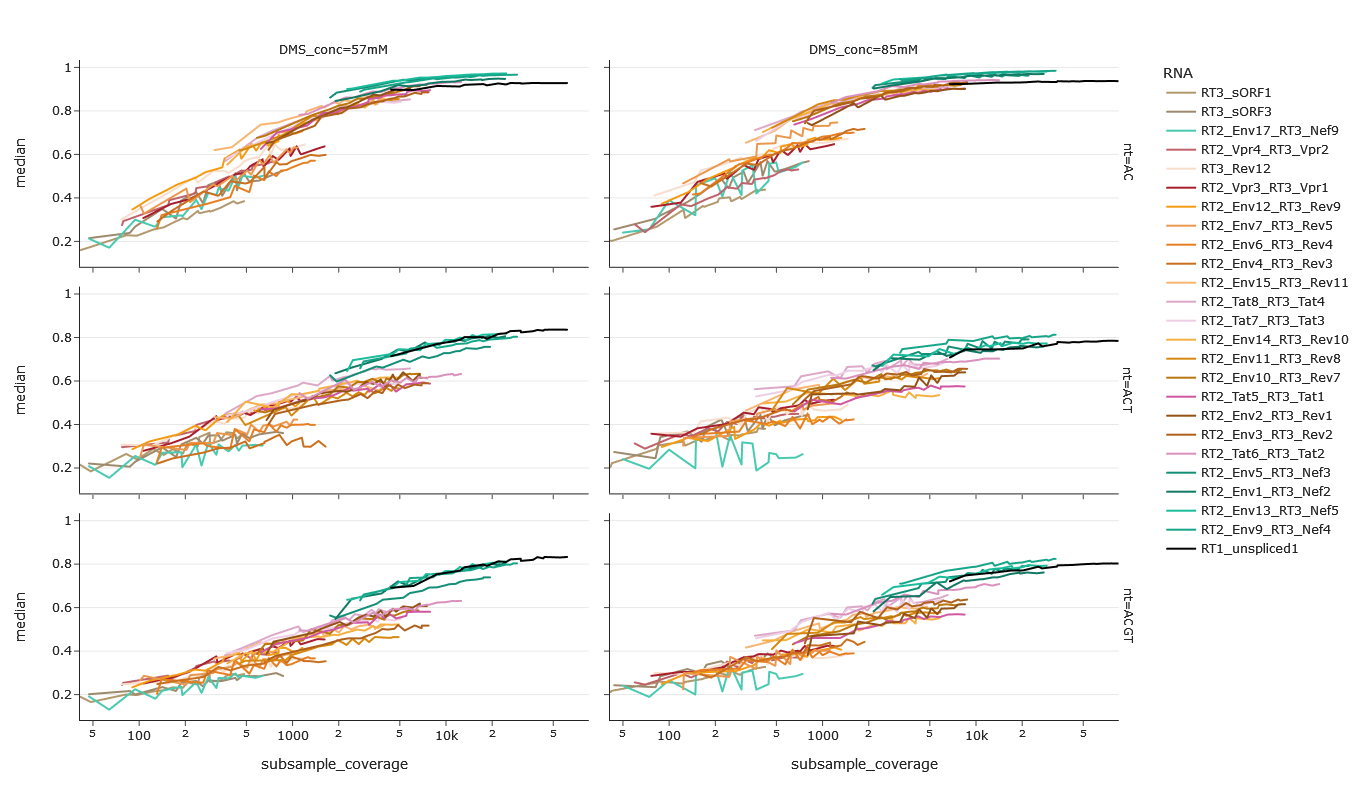

In [114]:
fig = px.line(mean_corr_df.sort_values("subsample_coverage", ascending=True), x="subsample_coverage", y="median", color="RNA", facet_row="nt", facet_col="DMS_conc", category_orders=order_dict, color_discrete_map = isoform_colors_RT3)
fig.update_xaxes(type="log")
fig.write_image(f"figures/subsample_coverage_vs_median_pearson_corr.svg")
fig.show(renderer="jupyterlab")


In [112]:
example_isoforms = ["RT2_Vpr4_RT3_Vpr2", "RT2_Env4_RT3_Rev3", "RT2_Env11_RT3_Rev8", "RT2_Env3_RT3_Rev2", "RT2_Env5_RT3_Nef3", "RT1_unspliced1"]
sub_df = mean_corr_df[mean_corr_df["RNA"].isin(example_isoforms)]

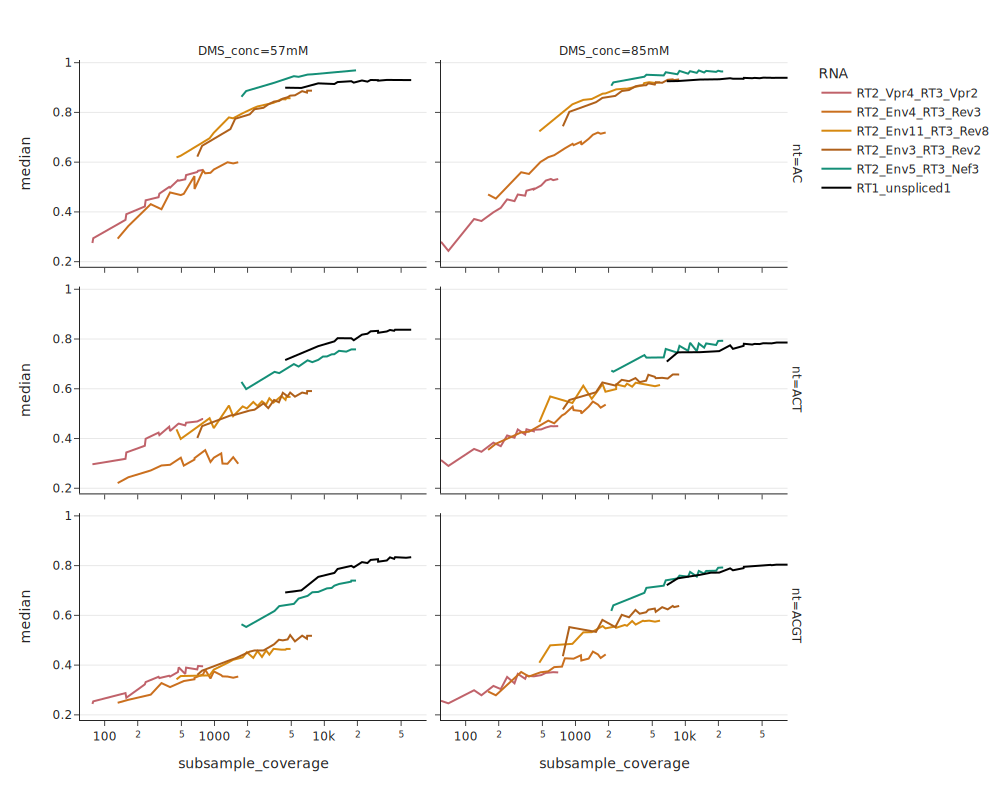

In [113]:
fig = px.line(sub_df.sort_values("subsample_coverage", ascending=True), x="subsample_coverage", y="median", color="RNA", facet_row="nt", facet_col="DMS_conc", category_orders=order_dict, color_discrete_map = isoform_colors_RT3)
fig.update_xaxes(type="log")
fig.write_image(f"figures/subsample_coverage_vs_median_pearson_corr_example_isoforms.svg")
fig.show(renderer='png')